## Tarea 2

Estudiante: Rodrigo Mauricio Garcia Saenz

----

Función objetivo: $f(x) = 1+5x_1+2x_2$

In [39]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Load inputData
input_data = np.genfromtxt('inputData.csv', delimiter=',')

#Load the other datasets with increasing number of data points 
input_datas = {}
for i in [20, 100, 1000]:
    datas = np.genfromtxt('inputData{}.csv'.format(i), delimiter=',') 
    input_datas['inputData{}'.format(i)] = datas  # str.format() method https://www.geeksforgeeks.org/python-format-function/

# Weights of the target function f=sing(w^t*x)
w = np.array([1,5,2])

# functions in python https://www.w3schools.com/python/python_functions.asp


#Plot the examples
def plot_graph(input_data, weights):
    # input_data: (N,2) matrix where N is number of data points and the rows represent the features x1 and x2, 
    # respectively
    # weights: vector with 3 elements (3,)
    f = np.sign(w[0] + w[1]*input_data[:, 0] + w[2]*input_data[:, 1]).reshape(-1,1)
    pos = (f >= 0).reshape(-1,)
    neg = (f < 0).reshape(-1,)
    plt.scatter(input_data[pos, 0], input_data[pos, 1], \
                color = 'b', marker='o', label='+1')
    plt.scatter(input_data[neg, 0], input_data[neg, 1], \
                color = 'r', marker='s', label='-1')
    plt.xlabel('x1')
    plt.ylabel('x2')
    if np.array([(str(type(weights[k])).find('int') != -1) for k in range(len(weights))]).all(): # int type
        label_g='sign({} + {}*x_1 + {}*x_2)'.format(weights[0],weights[1], weights[2])
    else:
        label_g='sign({0:.3} + {1:.3}*x_1 + {2:.3}*x_2)'.format(weights[0], weights[1], weights[2])
    x1_axis = np.linspace(input_data[:, 0].min()-1,input_data[:, 0].max()+1, 100)
    x2_axis = (-weights[1] /weights[2])* x1_axis - (weights[0] / weights[2])   #0=w_0+w_1x_1+w_2*x_2
    plt.plot(x1_axis,x2_axis, color='purple',label=label_g)
    if np.array([(str(type(w[k])).find('int') != -1) for k in range(len(w))]).all(): # int type
        label_f='sign({} + {}*x_1 + {}*x_2)'.format(w[0],w[1], w[2])
    else:
        label_f='sign({0:.3} + {1:.3}*x_1 + {2:.3}*x_2)'.format(w[0], w[1], w[2])
    x1_axis = np.linspace(input_data[:, 0].min()-1,input_data[:, 0].max()+1, 100)
    x2_axis = (-w[1] / w[2])* x1_axis - (w[0] / w[2])   #0=w_0+w_1x_1+w_2*x_2
    plt.plot(x1_axis,x2_axis, color='green',label=label_f)
    plt.legend()
    plt.ylim([input_data[:, 1].min()-1,input_data[:, 1].max()+1])
    plt.xlim([input_data[:, 0].min()-1,input_data[:, 0].max()+1])
    plt.show()

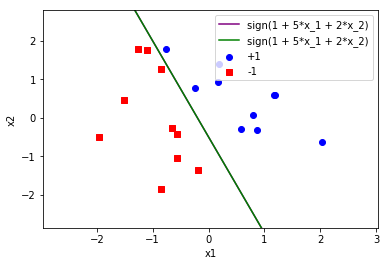

In [40]:
# This line of code uses the function plot_graph to create a figure with the samples in "inputData"
# and the target function
plot_graph(input_data,w)

In [57]:
# This part of the code creates a function to implement the perceptron learning algorithm 
def perceptron(input_data,f_weights):    
    #Create a matrix data where each column represents a data point

    # aqui agrega una columna de unos a input_data y lo guarda en `data'
    #https://docs.scipy.org/doc/numpy/reference/generated/numpy.c_.html
    data = np.c_[np.ones((input_data.shape[0],1)), input_data]  
    # Compute for each data point the output for your target function f(x)
    # Useful function np.sign()
    
    f_weights=f_weights.reshape(-1,1) # reshaped such that it is a column vector
    f = np.sign(data @ f_weights)
   
    #Initialization of w, selected to be random

    # genera toda una columna de valores al azar
    w = np.random.random(data.shape[1]).reshape(-1,1)  # reshaped such that it is a column vector
    
    # Output values using your current estimated vector of weights. 
    # Useful function np.sign()
    
    h = np.sign(data @ w)
    
    # Compare result between using the target function and using the current estimate for the weights

    diferencias = (f != h)
    convergencia = np.any(diferencias)

    ### Implement the Perceptron Learning algorithm i.e. and iterative process
    
    iterations = 0
    while convergencia:
        for i, diferencia in enumerate(diferencias):
            if diferencia == True:
                # actualiza w = w + yx
                w = w + f[i]*data[i,:].reshape(w.shape)
                # recalculando
                h = np.sign(data @ w)
                diferencias = (f != h)
                convergencia = np.any(diferencias)
                iterations += 1
                break
    return w, iterations

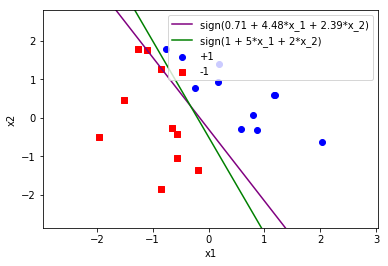

Number of Iterations = 24 for input_data
w estiamdo: [[0.71032318]
 [4.47561833]
 [2.39477491]]


In [58]:
#Plot target and estimated function and data points for inputData
w_estimated, iterations = perceptron(input_data,w)
plot_graph(input_data, w_estimated[:,0])
print('Number of Iterations = {} for input_data'.format(iterations))
print('w estiamdo:', w_estimated)

Luego de aplicar el perceptron al conjunto de datos `input_data`, $g(x) = 0.8141 + 4.3617 x_1 + 2223 x_2$ y la función objetivo es $f(x) = 1+5x_1+2x_2$. 

Una forma de comparar la aproximación de $g(x)$ con $f(x)$ es comparando el ángulo entre ambos vectores de coeficientes.

$$
\alpha = cos^{-1}(\frac{w^T x}{||w||*||x||})
$$


In [59]:
# angulo basado en el producto punto
def angulo(w1,w2):
    return np.arccos(np.dot(w1.T, w2)/(np.linalg.norm(w1)*np.linalg.norm(w2)))

In [62]:
_w = w.reshape(1,-1)[0,:]
_w_estimated = w_estimated.reshape(1,-1)[0,:]
𝛼 = angulo(_w, _w_estimated)
print('ángulo 𝛼 = {:.2}°'.format(𝛼))

ángulo 𝛼 = 0.12°


El ángulo de 0.12° es pequeño lo que indica que hay una buena aproximación entre $g(x)$ y $f(x)$

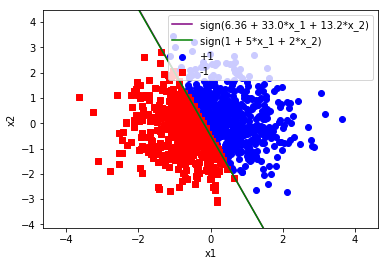

Number of Iterations = 1330 for inputData1000
𝛼: 0.0065°


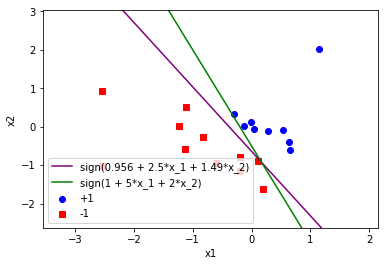

Number of Iterations = 8 for inputData20
𝛼: 0.2°


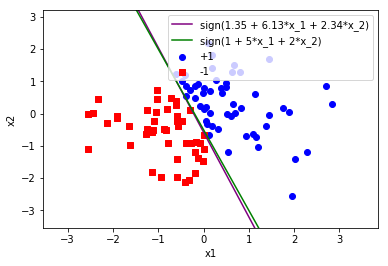

Number of Iterations = 79 for inputData100
𝛼: 0.025°


In [63]:
# Run the perceptron and plot estimated and target function
for i in input_datas.keys():
    w_estimated, iterations = perceptron(input_datas[i],w)
    plot_graph(input_datas[i], w_estimated[:,0])
    print('Number of Iterations = {} for {}'.format(iterations,i))
    # ángulo entre g(x) y f(x)
    _w = w.reshape(1,-1)[0,:]
    _w_estimated = w_estimated.reshape(1,-1)[0,:]
    𝛼 = angulo(_w, _w_estimated)
    print("𝛼: {:.2}°".format(𝛼))

El algoritmo del perceptrón converge con todos los datos de entrada por ser $f(x)$ una función lineal que se puede alcanzar. 

Comarando la aproximación entre $g(x)$ con $f(x)$ se ve que el ángulo entre ambos vectores de coeficientes es menor a 1° lo que indica una buena aproximación y para el caso de `inputData1000` que concluye en más de 500 iteraciones se tiene un ángulo mucho menor mejorando la aproximación entre $f(x)$ y $g(x)$.
